In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# 0 = don't care
# 1 = foreground
#-1 = background
def hit_miss_transform(img, b):
    ind1 =[b== 1]
    ind2 = [b== -1]
    
    img_pad = np.zeros([img.shape[0]+2, img.shape[1]+2], dtype=np.uint8)
    img_pad[1:-1,1:-1] = img

    b1 = np.zeros(b.shape, dtype=np.uint8)#foreground
    b2 = np.zeros(b.shape, dtype=np.uint8)#background
    
    b1[ind1] = 1
    b2[ind2] = 1
       
    e1 = cv2.erode(img_pad, b1)
    e2 = cv2.erode(cv2.bitwise_not(img_pad), b2)
    
    c = e1&e2
                   
    return c[1:-1,1:-1]

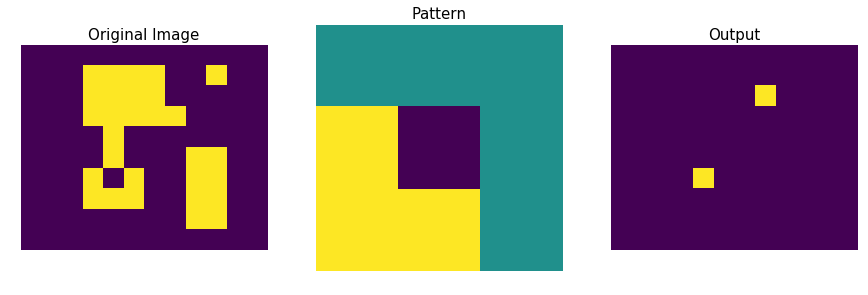

In [3]:
#example adapted from opencv: https://docs.opencv.org/trunk/db/d06/tutorial_hitOrMiss.html
input_image = np.array((
    [0,0,0, 0, 0, 0, 0, 0, 0, 0,0,0],
    [0,0,0, 255, 255, 255, 255, 0, 0, 255,0,0],
    [0,0,0, 255, 255, 255, 255, 0, 0, 0,0,0],
    [0,0,0, 255, 255, 255, 255, 255, 0, 0,0,0],
    [0,0,0, 0, 255, 0, 0, 0, 0, 0,0,0],
    [0,0,0, 0, 255, 0, 0, 0, 255, 255,0,0],
    [0,0,0,255, 0, 255, 0, 0, 255, 255,0,0],
    [0,0,0, 255, 255, 255, 0, 0, 255, 255,0,0],
    [0,0,0, 0, 0, 0, 0, 0, 255, 255,0,0],
    [0,0,0, 0, 0, 0, 0, 0, 0, 0,0,0]), dtype="uint8")

# 0 = don't care
# 1 = foreground
#-1 = background

kernel = np.array((
        [0, 0, 0],
        [1, -1, 0],
        [1, 1, 0]), dtype="int")


a = hit_miss_transform(input_image, kernel)
output_image = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, kernel, cv2.BORDER_CONSTANT  )
plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.axis("off")
plt.title("Original Image", fontsize=15)
plt.imshow(input_image)
plt.subplot(1,3,2)
plt.axis("off")
plt.title("Pattern", fontsize=15)
plt.imshow(kernel)
plt.subplot(1,3,3)
plt.axis("off")
plt.title("Output", fontsize=15)
plt.imshow(a)
plt.show()

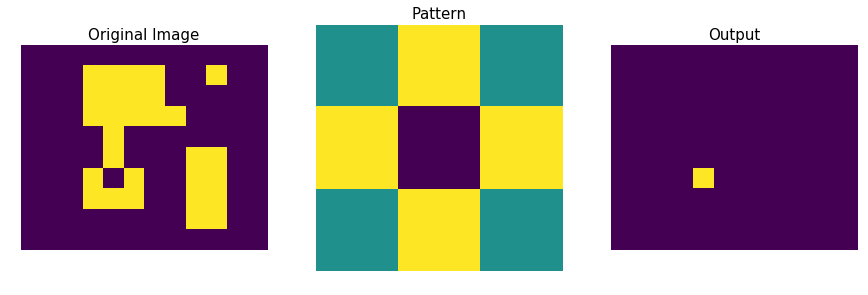

In [4]:
kernel = np.array((
        [0, 1, 0],
        [1, -1, 1],
        [0, 1, 0]), dtype="int")


a = hit_miss_transform(input_image, kernel)
output_image = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, kernel, cv2.BORDER_CONSTANT  )
plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.axis("off")
plt.title("Original Image", fontsize=15)
plt.imshow(input_image)
plt.subplot(1,3,2)
plt.axis("off")
plt.title("Pattern", fontsize=15)
plt.imshow(kernel)
plt.subplot(1,3,3)
plt.axis("off")
plt.title("Output", fontsize=15)
plt.imshow(a)
plt.show()

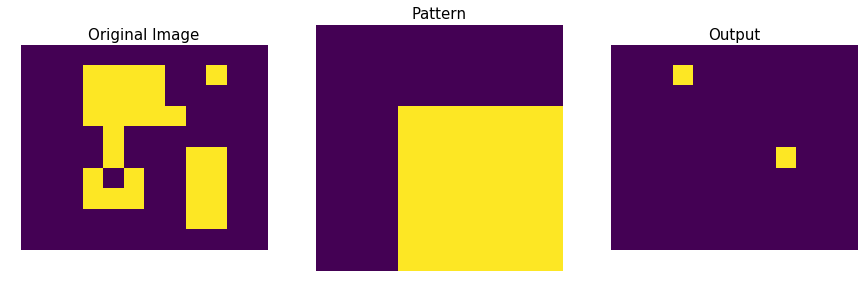

In [5]:
kernel = np.array((
        [-1, -1,-1],
        [-1, 1, 1],
        [-1, 1, 1]), dtype="int")


a = hit_miss_transform(input_image, kernel)
output_image = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, kernel, cv2.BORDER_CONSTANT  )
plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.axis("off")
plt.title("Original Image", fontsize=15)
plt.imshow(input_image)
plt.subplot(1,3,2)
plt.axis("off")
plt.title("Pattern", fontsize=15)
plt.imshow(kernel)
plt.subplot(1,3,3)
plt.axis("off")
plt.title("Output", fontsize=15)
plt.imshow(a)
plt.show()